In [55]:
import pandas as pd
import numpy as np
import subprocess
import os
import os.path
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer

import seaborn as sn
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Setting pandas options
#pd.options.display.max_rows = 90
#pd.options.display.max_columns = None

#pd.reset_option('max_columns')

Train data

Descriptive statistics

In [3]:
#import train.csv file
df = pd.read_csv('C:/Users/julij/wgt/WGT-House_Prices/data/train.csv', header=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Missing values

In [6]:
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

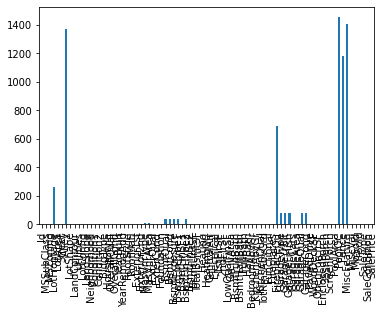

In [7]:
print(df.isna().sum().plot(kind="bar"))
plt.show

In [8]:
#Trūkstamos reikšmės šiuose stulpeliuose
def missing_cols(dataframe):
    missing_df = {} #dictionary???

    for column in dataframe.columns:
        if dataframe[column].isna().sum() > 0:
            missing_df[column] = dataframe[column]

    # converting the missing_df to a dataframe
    missing_df = pd.DataFrame(missing_df, index = ['MissingValues']).T.sort_values(by='MissingValues', ascending=False)
    return missing_df

missing_df = missing_cols(df)
print(len(missing_df))
print(missing_df)

19
             MissingValues
LotFrontage            NaN
Alley                  NaN
MasVnrType             NaN
MasVnrArea             NaN
BsmtQual               NaN
BsmtCond               NaN
BsmtExposure           NaN
BsmtFinType1           NaN
BsmtFinType2           NaN
Electrical             NaN
FireplaceQu            NaN
GarageType             NaN
GarageYrBlt            NaN
GarageFinish           NaN
GarageQual             NaN
GarageCond             NaN
PoolQC                 NaN
Fence                  NaN
MiscFeature            NaN


In [9]:
#####?????????????????????
#Generate three lists with columns depending on their type
#ar tikrai tinkamai?
#def generate_list(dataframe):
#    col_na_to_None = []
#    col_na_to_mf = []
#    col_na_to_avg = []
#    for column in dataframe:
#        if dataframe[column].dtype == 'object':
#            col_na_to_None.append(dataframe[column])
 #       elif dataframe[column].dtype == 'float64':
 #           col_na_to_mf.append(dataframe[column])
 #       elif dataframe[column].dtype == 'int64':
 #           col_na_to_avg.append(dataframe[column])
 #   return col_na_to_None
 #   return col_na_to_mf
 #   return col_na_to_avg

#col_na_to_mf = generate_list(df)
#col_na_to_avg = generate_list(df)
#print(col_na_to_None)

#def column_na_to_None(dataframe):
#    col_na_to_None = []
#    for column in dataframe.columns:
#        if dataframe[column].dtype == 'object' and dataframe[column] == missing_df[column]:
#            col_na_to_None.append(column)
#    return col_na_to_None

#col_na_to_None = column_na_to_None(df)


#type in df
#float64(3), int64(35), object(43)


In [10]:
# Handling missing values
# creating columns depending on the imputing value for missing values
col_na_to_None = ['Alley',
                      'BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'FireplaceQu',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond',
                      'PoolQC',
                      'MiscFeature']

col_na_to_mf = ['MasVnrType',
                    'Electrical',
                    'Fence']

col_na_to_avg = ['LotFrontage',
                     'MasVnrArea',
                     'GarageYrBlt']

In [11]:
#Simple Imputer for missing values train set
def removing_missing_values(dataframe):

   for column in col_na_to_None:
      imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value='None')
      imputer.fit(dataframe.loc[:, col_na_to_None])
      dataframe.loc[:, col_na_to_None] = imputer.transform(dataframe.loc[:, col_na_to_None])

   for column in col_na_to_mf:
      imputer2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
      imputer2.fit(dataframe.loc[:, col_na_to_mf])
      dataframe.loc[:, col_na_to_mf] = imputer2.transform(dataframe.loc[:, col_na_to_mf])

   for column in col_na_to_avg:
      imputer3 = SimpleImputer(missing_values = np.nan, strategy='mean')
      imputer3.fit(dataframe.loc[:, col_na_to_avg])
      dataframe.loc[:, col_na_to_avg] = imputer3.transform(dataframe.loc[:, col_na_to_avg])

   return dataframe

df_c = removing_missing_values(df)
#print(df_c)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

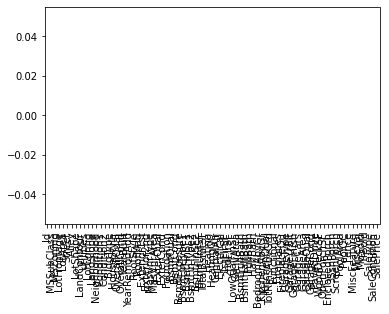

In [12]:
print(df_c.isna().sum().plot(kind="bar"))
plt.show

Test data

Descriptive statistics

In [13]:
#import test data
df_test = pd.read_csv('C:/Users/julij/wgt/WGT-House_Prices/data/test.csv', header=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,12,2008,WD,Normal,250000


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Missing values

In [16]:
print(df_test.isna().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

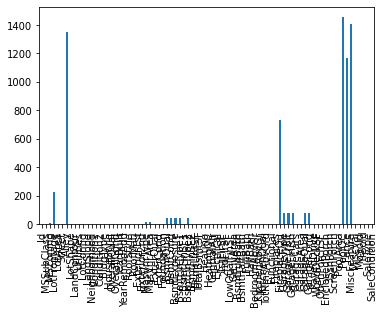

In [17]:
print(df_test.isna().sum().plot(kind="bar"))
plt.show

In [18]:
#Trūkstamos reikšmės šiuose stulpeliuose
def missing_cols(dataframe):
    missing_df = {} #dictionary???

    for column in dataframe.columns:
        if dataframe[column].isna().sum() > 0:
            missing_df[column] = dataframe[column]

    # converting the missing_df to a dataframe
    missing_df = pd.DataFrame(missing_df, index = ['MissingValues']).T.sort_values(by='MissingValues', ascending=False)
    return missing_df

missing_df_test = missing_cols(df_test)
print(len(missing_df_test))
print(missing_df_test)

33
             MissingValues
MSZoning               NaN
LotFrontage            NaN
Alley                  NaN
Utilities              NaN
Exterior1st            NaN
Exterior2nd            NaN
MasVnrType             NaN
MasVnrArea             NaN
BsmtQual               NaN
BsmtCond               NaN
BsmtExposure           NaN
BsmtFinType1           NaN
BsmtFinSF1             NaN
BsmtFinType2           NaN
BsmtFinSF2             NaN
BsmtUnfSF              NaN
TotalBsmtSF            NaN
BsmtFullBath           NaN
BsmtHalfBath           NaN
KitchenQual            NaN
Functional             NaN
FireplaceQu            NaN
GarageType             NaN
GarageYrBlt            NaN
GarageFinish           NaN
GarageCars             NaN
GarageArea             NaN
GarageQual             NaN
GarageCond             NaN
PoolQC                 NaN
Fence                  NaN
MiscFeature            NaN
SaleType               NaN


In [19]:
# Missing columns for testing set
columns_na_to_None_test = ['Alley',
                      'BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'FireplaceQu',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond',
                      'PoolQC',
                      'MiscFeature']

columns_na_to_mf_test = ['MSZoning',
                    'Utilities',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'Fence',
                    'SaleType']

columns_na_to_avg_test = ['LotFrontage',
                     'MasVnrArea',
                     'BsmtFinSF1',
                     'BsmtFinSF2',
                     'BsmtUnfSF',
                     'TotalBsmtSF',
                     'GarageYrBlt']

columns_na_to_0_test = ['BsmtFullBath',
                   'BsmtHalfBath',
                   'GarageCars',
                   'GarageArea']

In [20]:
#Simple Imputer for missing values test set
def removing_missing_values_test(dataframe):

   for column in columns_na_to_None_test:
      imputer4 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value='None')
      imputer4.fit(dataframe.loc[:, columns_na_to_None_test])
      dataframe.loc[:, columns_na_to_None_test] = imputer4.transform(dataframe.loc[:, columns_na_to_None_test])

   for column in columns_na_to_mf_test:
      imputer5 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
      imputer5.fit(dataframe.loc[:, columns_na_to_mf_test])
      dataframe.loc[:, columns_na_to_mf_test] = imputer5.transform(dataframe.loc[:, columns_na_to_mf_test])

   for column in columns_na_to_avg_test:
      imputer6 = SimpleImputer(missing_values = np.nan, strategy='mean')
      imputer6.fit(dataframe.loc[:, columns_na_to_avg_test])
      dataframe.loc[:, columns_na_to_avg_test] = imputer6.transform(dataframe.loc[:, columns_na_to_avg_test])
   
   for column in columns_na_to_0_test:
      imputer7 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value = 0)
      imputer7.fit(dataframe.loc[:, columns_na_to_0_test])
      dataframe.loc[:, columns_na_to_0_test] = imputer7.transform(dataframe.loc[:, columns_na_to_0_test])

   return dataframe

df_c_test = removing_missing_values_test(df_test)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

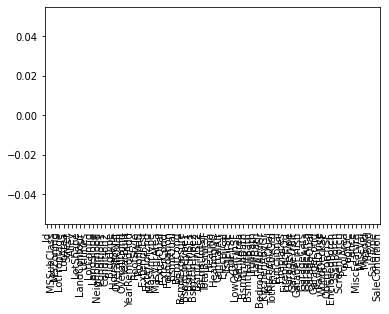

In [21]:
print(df_c_test.isna().sum().plot(kind="bar"))
plt.show

Correlation:
SalePrice have high (more than 60%) Spearman correlation with OverallQual 0.79, GrLiveArea 0.71, TotalBsmtSF 0.61, 1stFlrSF 0.61, GarageCaars 0.64, GarageArea 0.62

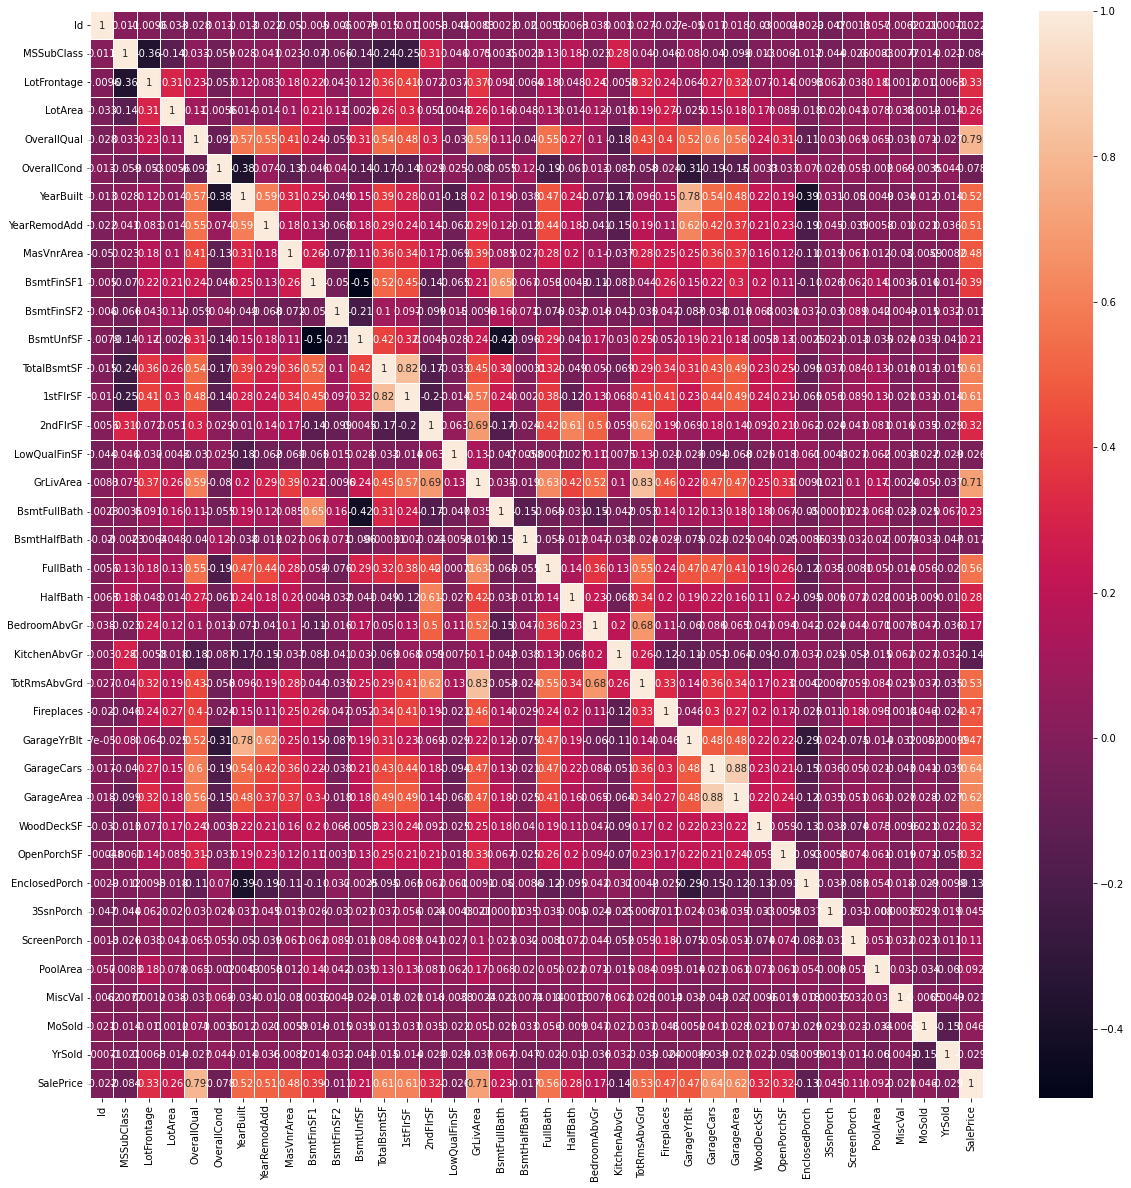

In [35]:
corrMatrix = df_c.corr(method='pearson', )
#sn.heatmap(corrMatrix, annot=True)

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Dirtribution

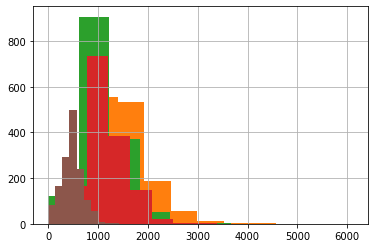

In [45]:
correlated_var = [df['OverallQual'], df['GrLivArea'], df['TotalBsmtSF'], df['1stFlrSF'], df['GarageCars'], df['GarageArea']]
for column in correlated_var:
    column.hist(by=None, bins=10)

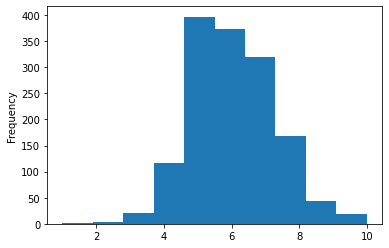

In [46]:
distr_OverallQual = df_c['OverallQual'].plot.hist(by=None, bins=10)


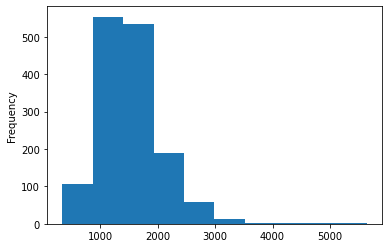

In [47]:
distr_GrLivArea = df_c['GrLivArea'].plot.hist(by=None, bins=10)

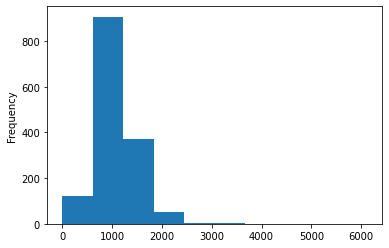

In [48]:
distr_TotalBsmtSF = df_c['TotalBsmtSF'].plot.hist(by=None, bins=10)

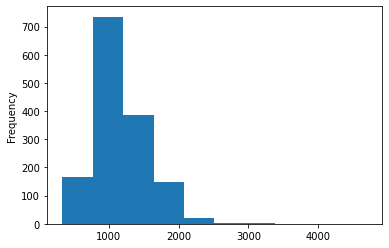

In [49]:
distr_1stFlrSF = df_c['1stFlrSF'].plot.hist(by=None, bins=10)

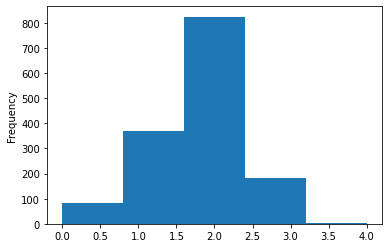

In [53]:
distr_GarageCars = df_c['GarageCars'].plot.hist(by=None, bins=5)

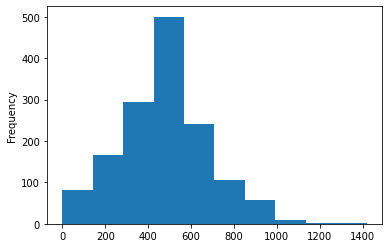

In [51]:
distr_GarageArea = df_c['GarageArea'].plot.hist(by=None, bins=10)


Outliers

In [ ]:
OverallQual 0.79, GrLiveArea 0.71, TotalBsmtSF 0.61, 1stFlrSF 0.61, GarageCaars 0.64, GarageArea 0.62

In [107]:
alpha = 1e-3
print("alpha = " + str(alpha))
for column in correlated_var:
    p = stats.normaltest(column)
    print(str(column.name) + " p = " + str(p[1]))
    if p[1] < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected for " + str(column.name))
    else:
        print("The null hypothesis cannot be rejected for " + str(column.name))

alpha = 0.001
OverallQual p = 0.002599900830568968
The null hypothesis cannot be rejected for OverallQual
GrLivArea p = 1.203766500154145e-95
The null hypothesis can be rejected for GrLivArea
TotalBsmtSF p = 5.49600173425753e-136
The null hypothesis can be rejected for TotalBsmtSF
1stFlrSF p = 7.82812962817983e-101
The null hypothesis can be rejected for 1stFlrSF
GarageCars p = 3.1754859159754766e-07
The null hypothesis can be rejected for GarageCars
GarageArea p = 4.055158198327446e-08
The null hypothesis can be rejected for GarageArea


In [113]:
#outliers for GarageArea
outliers1 = df_c[(df_c['GarageArea'] > 4000) & (df_c["SalePrice"] <= 300000)].index.tolist()

# Drop these outlier
df_train_new = df_c.drop(df_c.index[outliers1])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

In [114]:
#for column in correlated_var:
#    outlier = column > 4000 & (df_c["SalePrice"] <= 300000).index.tolist()
#    df_train_new = df_c.drop(df_c.index[outlier])
#    df_train_new = df_train_new.reset_index().drop("index", axis=1)

correlated_var_new = [df_train_new['OverallQual'], df_train_new['GrLivArea'], df_train_new['TotalBsmtSF'], 
                        df_train_new['1stFlrSF'], df_train_new['GarageCars'], df_train_new['GarageArea']]


In [115]:
for column in correlated_var_new:
    p = stats.normaltest(column)
    print(str(column.name) + " p = " + str(p[1]))
    if p[1] < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected for " + str(column.name))
    else:
        print("The null hypothesis cannot be rejected for " + str(column.name))

OverallQual p = 0.002599900830568968
The null hypothesis cannot be rejected for OverallQual
GrLivArea p = 1.203766500154145e-95
The null hypothesis can be rejected for GrLivArea
TotalBsmtSF p = 5.49600173425753e-136
The null hypothesis can be rejected for TotalBsmtSF
1stFlrSF p = 7.82812962817983e-101
The null hypothesis can be rejected for 1stFlrSF
GarageCars p = 3.1754859159754766e-07
The null hypothesis can be rejected for GarageCars
GarageArea p = 4.055158198327446e-08
The null hypothesis can be rejected for GarageArea


Tranforming variables (yeras, logs, etc.)

Encoding

In [ ]:
def encoding(dataframe):
    #make dataframe copy
    dataframe_encoding = dataframe.copy()
    dataframe_encoding = pd.get_dummies(dataframe)
    return dataframe_encoding

df_c_encoding = encoding(df_c)
df_c_test_encoding = encoding(df_c_test)

Regression

In [26]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#import feature_engineering

In [29]:
def regression (dataframe):
    X = dataframe.drop('SalePrice',axis=1).copy()
    y = dataframe['SalePrice']
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(xtrain, ytrain)
    ypred = reg.predict(xtest)
    offline_value = reg.score(X, y)
    return print("Offline value "+str(offline_value))

regression(df_c_encoding)

Offline value 0.8178587035671101


In [ ]:
#pathai, kintamieji, funkcijų vykdymas
if __name__ == "__main__":
    df_train = pd.read_csv(r'.\data\train.csv')
    train_size = 0.8
    test_size=0.2

Various models (decision trees and etc.)